#### Testing the validity of two datasets through comparison. Datasets are from the same source with 10 years between collection.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Separate files being loaded independantly

In [2]:
csv_one = pd.read_csv("population_by_zip_2000.csv")

In [3]:
csv_two = pd.read_csv("population_by_zip_2010.csv")

#### previewing headers to verify files do not mirror each other

In [4]:
csv_one.head()

,minimum_age,maximum_age,gender,population,zipcode,geo_id
0,10.0,14.0,female,75,39769,8600000US39769
1,85.0,NaN,female,130,44047,8600000US44047
2,30.0,34.0,female,11,42436,8600000US42436
3,22.0,24.0,male,22,99685,8600000US99685
4,67.0,69.0,male,69,04239,8600000US04239


In [5]:
csv_two.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042


#### Joining the two files into one before performing calculations

In [6]:
merged_data = pd.merge(csv_one, csv_two, on='geo_id', how='right')
merged_data.head()


,minimum_age_x,maximum_age_x,gender_x,population_x,zipcode_x,geo_id,population_y,minimum_age_y,maximum_age_y,gender_y,zipcode_y
0,50.0,54.0,male,51.0,61747,8600000US61747,50,30.0,34.0,female,61747
1,62.0,64.0,female,17.0,61747,8600000US61747,50,30.0,34.0,female,61747
2,NaN,NaN,NaN,1472.0,61747,8600000US61747,50,30.0,34.0,female,61747
3,50.0,54.0,female,45.0,61747,8600000US61747,50,30.0,34.0,female,61747
4,10.0,14.0,male,59.0,61747,8600000US61747,50,30.0,34.0,female,61747


#### organizing columns for visual aesthetics

In [7]:
merged_data = merged_data.reindex(sorted(merged_data.columns), axis=1)
merged_data.head()

,gender_x,gender_y,geo_id,maximum_age_x,maximum_age_y,minimum_age_x,minimum_age_y,population_x,population_y,zipcode_x,zipcode_y
0,male,female,8600000US61747,54.0,34.0,50.0,30.0,51.0,50,61747,61747
1,female,female,8600000US61747,64.0,34.0,62.0,30.0,17.0,50,61747,61747
2,NaN,female,8600000US61747,NaN,34.0,NaN,30.0,1472.0,50,61747,61747
3,female,female,8600000US61747,54.0,34.0,50.0,30.0,45.0,50,61747,61747
4,male,female,8600000US61747,14.0,34.0,10.0,30.0,59.0,50,61747,61747


#### clean null values from population columns

In [8]:
merged_data['population_x'] = merged_data['population_x'].fillna(0)
merged_data['population_y'] = merged_data['population_y'].fillna(0)

#### sum population totals and assign to variable

In [9]:

population_x_total = sum(merged_data.population_x)
print(population_x_total)

population_y_total = sum(merged_data.population_y)
print(population_y_total)

41833409205.0
44785690977


##### Noting the population sum exceeds global population I can infer this dataset isn't soley population counts but also slices of total population measured by age ranges and identified by zipcode/geoid.

#### Display visual comparison of population change from 2000-2010

<AxesSubplot: >

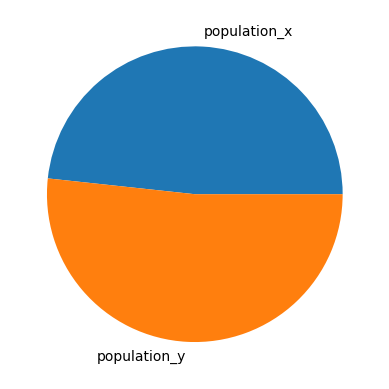

In [26]:
merged_data[merged_data.columns[7:9]].sum().plot.pie()


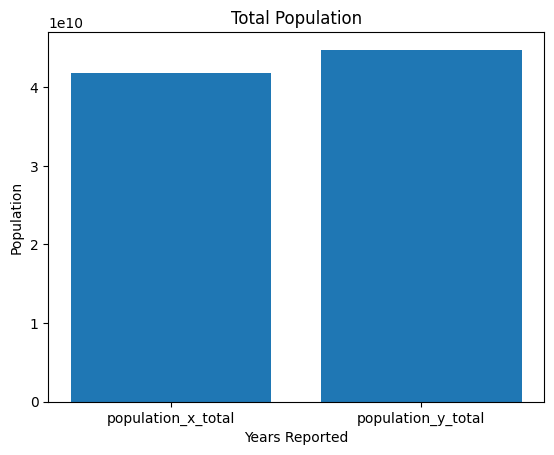

In [42]:
x_axis = ['population_x_total','population_y_total']
y_axis = [population_x_total, population_y_total]

plt.bar(x_axis, y_axis)
plt.title('Total Population')
plt.xlabel('Years Reported')
plt.ylabel('Population')
plt.show()

#### exploring average min/max ages

In [12]:
avg_max_age_x = merged_data["maximum_age_x"].mean()
print(avg_max_age_x)

avg_max_age_y = merged_data["maximum_age_y"].mean()
print(avg_max_age_y)

avg_min_age_x = merged_data["minimum_age_x"].mean()
print(avg_min_age_x)

avg_min_age_y = merged_data["minimum_age_y"].mean()
print(avg_min_age_y)

42.40909090909091
42.40909090909091
41.52173913043478
41.52173913043478


In [45]:
age_verify_x = merged_data['maximum_age_x'].sum()
print(age_verify_x)

age_verify_y = merged_data['maximum_age_y'].sum()
print(age_verify_y)

2868924618.0
2872175190.0


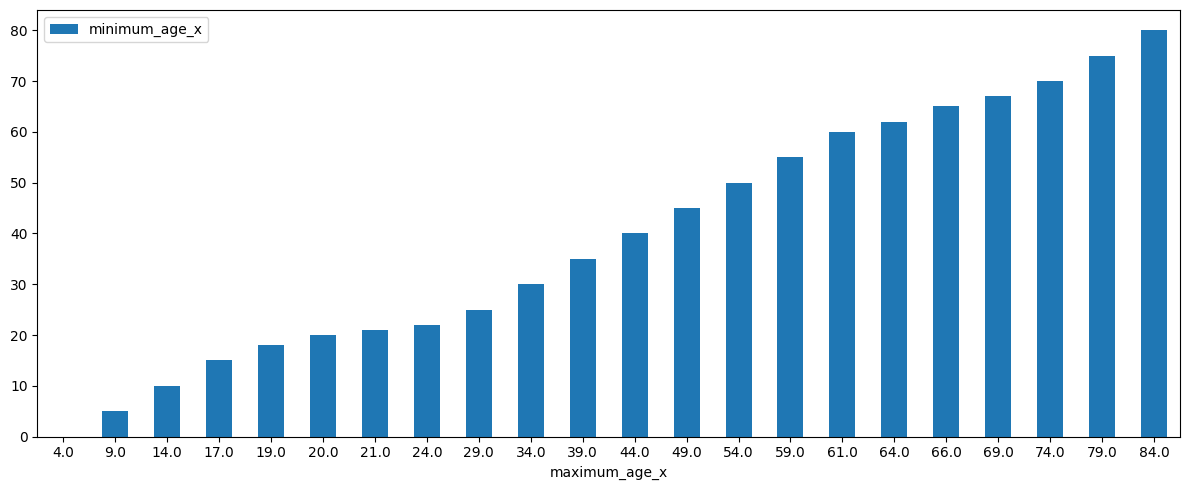

In [50]:
mean_age = merged_data.groupby('maximum_age_x')[['minimum_age_x']].mean().sort_values('minimum_age_x')


ax = mean_age.plot.bar(rot=0, figsize=(12, 5))
ax.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

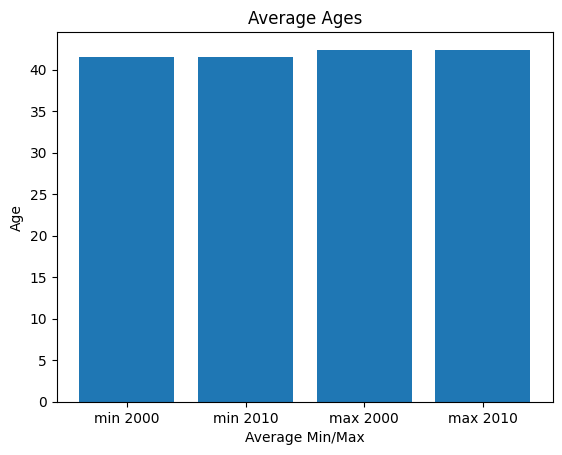

In [52]:
x_ax = ['min 2000','min 2010', 'max 2000', 'max 2010']
y_ax = [avg_min_age_x, avg_min_age_y, avg_max_age_x, avg_max_age_y]

plt.bar(x_ax, y_ax)
plt.title('Average Ages')
plt.xlabel('Average Min/Max')
plt.ylabel('Age')
plt.show()

#### Establish gender ratio per dataset. Values reported are which gender is most prevalent by reporting region.

In [14]:
male_x = merged_data["gender_x"].value_counts()["male"]
female_x = merged_data["gender_x"].value_counts()["female"]
print("Gender X counts male : ", male_x, ", female : ", female_x)

male_y = merged_data["gender_y"].value_counts()["male"]
female_y = merged_data["gender_y"].value_counts()["female"]
print("Gender Y counts male : ", male_y, ", female : ", female_y)

Gender X counts male :  36899352 , female :  36899352
Gender Y counts male :  36941160 , female :  36941160


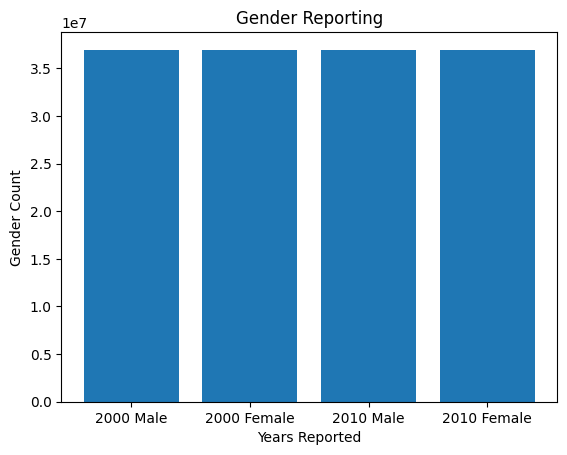

In [54]:
x_axis = ['2000 Male','2000 Female', '2010 Male', '2010 Female']
y_axis = [male_x, female_x, male_y, female_y]

plt.bar(x_axis, y_axis)
plt.title('Gender Reporting')
plt.xlabel('Years Reported')
plt.ylabel('Gender Count')
plt.show()

#### verifying the gender result counts are accurate as this seems odd for them to be identical

In [16]:
print(merged_data['gender_x'].value_counts()["male"])
print(merged_data['gender_x'].value_counts()["female"])

36899352
36899352


In [17]:
count_male = merged_data['gender_x']=="male"
count_male.sum()
count_female = merged_data['gender_x']=="female"
count_female.sum()

36899352

#### Conclusion based on findings. The two datasets show very strong similarities and trends in their reportings. Initially I believed something was wrong with these datasets. Upon visualization and examining the data I have determined this data is reported values not only by zipcode but by gender and age within that zipcode. For each zipcode there is a row for total population and mulitiple rows to show what portion of that total falls withing age ranges and gender values. Rather than multiple reportings per zipcode as initial expected. The above visualizations demonstrate how I ruled out the initial understanding of this data and came to this conclusion.